# Deep Learning for Handwritten Digits

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

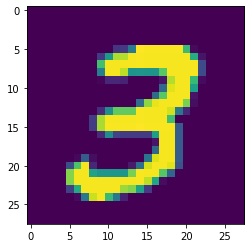

In [4]:
plt.imshow(train_images[7,:,:])

In [6]:
train_labels[7]

3

In [7]:
train_images[7,6,10]

139

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [10]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [12]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy',
                metrics=['accuracy'])

In [13]:
train_images_flat = train_images.reshape((60000, 28*28))
test_images_flat = test_images.reshape((10000, 28*28))

In [15]:
train_images_flat.shape

(60000, 784)

In [18]:
train_images_norm = train_images_flat.astype('float32') / 255
test_images_norm = test_images_flat.astype('float32') / 255

In [19]:
train_labels[0]

5

In [20]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [21]:
train_labels.shape

(60000, 10)

In [22]:
train_labels[0,:]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [23]:
network.fit(train_images_norm, train_labels, epochs = 5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.2566 - accuracy: 0.9247
Epoch 2/5
60000/60000 [==============================] - 1s 11us/sample - loss: 0.1044 - accuracy: 0.9690
Epoch 3/5
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0681 - accuracy: 0.9800
Epoch 4/5
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0503 - accuracy: 0.9850
Epoch 5/5
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0377 - accuracy: 0.9888


In [24]:
predictions = network.predict(test_images_norm)

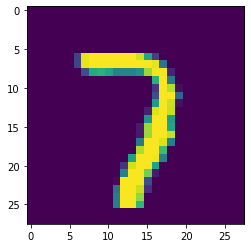

In [25]:
plt.imshow(test_images[756,:,:])

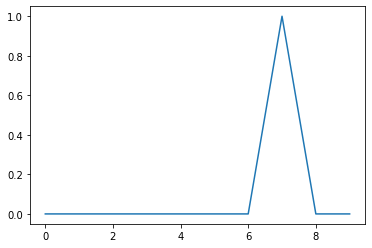

In [26]:
plt.plot(predictions[756])

In [27]:
test_loss, test_acc = network.evaluate(test_images_norm, test_labels)

10000/10000 [==============================] - 0s 40us/sample - loss: 0.0861 - accuracy: 0.9740


In [28]:
test_acc

0.974